In [1]:
from TABprocessor import *

In [2]:
def song_greek(song):
    '''
    对多个小节进行希腊字母化并组合成句
    '''
    
    def tokenizer_preprocess(measurepitch):
        '''
        由于huggingface的分词会把类似4B4C这种带数字的分开，因此把数字和升降号换成字母
        '''
        xila = ['t', 'u', 'v', 'w', 'x', 'y', 'z', 'j', 'k'] 
        sentence = ''
        for cunum, cu in enumerate(measurepitch):
            if 'SUS' in cu or 'R' in cu:
                cu = cu.replace(' ', '')
                sentence += cu
                sentence += ' '
            else:
                notes = cu.split()
                for notenum, note in enumerate(notes):
                    notes[notenum] = xila[int(note[0])] + note[1:]
                    if len(note) > 2:
                        if note[-1] == '#':
                            notes[notenum] = notes[notenum][0:2] + 'j' 
                        elif note[-1] == '-':
                            notes[notenum] = notes[notenum][0:2] + 'k' 

                for note in notes:
                    sentence += note
                sentence += ' '
        return sentence[0:-1]
            
    def tokenizer_deprocess(sentence):
        '''
        希腊字母的逆变换
        '''
        measure = []
        xila = ['t', 'u', 'v', 'w', 'x', 'y', 'z', 'j', 'k']
        octave = [' 0', ' 1', ' 2', ' 3', ' 4', ' 5', ' 6', '#', '-']
        cus = sentence.split()
        for cu in cus:
            for i in range(len(xila)):
                cu = cu.replace(xila[i], octave[i])
            cu = cu[1:]
            measure.append(cu)
        return measure
    song_sentence = ''
    for measure in song:
        song_sentence += tokenizer_preprocess(measure)
        song_sentence += ', '

    song_sentence = song_sentence[0:-2]
    return song_sentence

sub_dataset = readTAB('C:\\Users\\28056\\Desktop\\研究生\\AnimeTAB\\AnimeTAB\\clips\\')

#####0. [Air]てんとう虫(瓢虫)_14^21C.xml
#####1. [Air]てんとう虫(瓢虫)_2^5I.xml
#####2. [Air]てんとう虫(瓢虫)_42^49B.xml
#####3. [Air]てんとう虫(瓢虫)_6^13A.xml
#####4. [Air]回想录_9^20B.xml
#####5. [Air]夢語り_1^8A.xml
#####6. [Air]夢語り_9^16B.xml
#####7. [Air]银色_16^27B.xml
#####8. [Air]鸟之诗_10^27B.xml
#####9. [Air]鸟之诗_1^9I.xml
#####10. [Air]鸟之诗_28^43A.xml
#####11. [Air]鸟之诗_44^58C.xml
#####12. [Angel Beats!]Brave Song_16^25C.xml
#####13. [Angel Beats!]Brave Song_1^15A.xml
#####14. [Angel Beats!]Brave Song_26^49B.xml
#####15. [Angel Beats!]一番の宝物_1^8 I.xml
#####16. [Angel Beats!]一番の宝物_9^24 A.xml
#####17. [Beck]Face_13^23A.xml
#####18. [Beck]Face_25^33B.xml
#####19. [CLANNAD]メグメル(幻想)_1^15I.xml
#####20. [CLANNAD]メグメル(幻想)_23^30A.xml
#####21. [CLANNAD]メグメル(幻想)_31^49B.xml
#####22. [CLANNAD]东风_10^26A.xml
#####23. [CLANNAD]东风_1^9I.xml
#####24. [CLANNAD]团子大家族_25^32C.xml
#####25. [CLANNAD]团子大家族_33^48B.xml
#####26. [CLANNAD]团子大家族_9^24A.xml
#####27. [CLANNAD]欢乐岛_1^15I.xml
#####28. [CLANNAD]欢乐岛_24^34A.xml
#####29. [CLANNAD]欢乐岛_35^42C.

In [3]:
#备份一份歌曲
import copy
sentences, root_sentences = [], []
copy_dataset = []
for song in sub_dataset:
    copy_dataset.append(copy.deepcopy(song))
    

In [4]:
all_keys = ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'C#', 'D#', 'F#', 'G#', 'A#']
division = 16


In [5]:
for i, osong in enumerate(copy_dataset):
    if i not in [397, 400, 411, 413] and osong.info.beat == '4':
        for key in all_keys:
            
            
            song = copy.deepcopy(osong)
            newsong = Tablature(pitch=None, finger=None, time=None)
            newsong.pitch = song.key_shift(key)
            newsong.finger = song.finger
            newsong.time = song.time
            newsong.info = song.info
            vec_song = newsong.vectorization(division=division)
            try:
                assert len([i for i in vec_song.pitch if len(i) != division]) == 0
                sentence = song_greek(vec_song.pitch)
                sentences.append(sentence)
            
            except:
                print(i, copy_dataset[i].info.name)
                print([len(i) for i in vec_song.pitch if len(i) != division])
            
            
            root_song = newsong.root_and_melody()
            vec_root_song = root_song.vectorization(division=division)
            
            try:
                assert len([i for i in vec_root_song.pitch if len(i) != division]) == 0    
                root_sentence = song_greek(vec_root_song.pitch)
                root_sentences.append(root_sentence)
            except:
                '''print(i, copy_dataset[i].info.name)
                print([len(i) for i in vec_root_song.pitch if len(i) != division])'''
                0
        del(osong)
 

0 てんとう虫(瓢虫)_14^21C
[15]
0 てんとう虫(瓢虫)_14^21C
[15]
0 てんとう虫(瓢虫)_14^21C
[15]
0 てんとう虫(瓢虫)_14^21C
[15]
0 てんとう虫(瓢虫)_14^21C
[15]
0 てんとう虫(瓢虫)_14^21C
[15]
0 てんとう虫(瓢虫)_14^21C
[15]
0 てんとう虫(瓢虫)_14^21C
[15]
0 てんとう虫(瓢虫)_14^21C
[15]
0 てんとう虫(瓢虫)_14^21C
[15]
0 てんとう虫(瓢虫)_14^21C
[15]
0 てんとう虫(瓢虫)_14^21C
[15]
2 てんとう虫(瓢虫)_42^49B
[15]
2 てんとう虫(瓢虫)_42^49B
[15]
2 てんとう虫(瓢虫)_42^49B
[15]
2 てんとう虫(瓢虫)_42^49B
[15]
2 てんとう虫(瓢虫)_42^49B
[15]
2 てんとう虫(瓢虫)_42^49B
[15]
2 てんとう虫(瓢虫)_42^49B
[15]
2 てんとう虫(瓢虫)_42^49B
[15]
2 てんとう虫(瓢虫)_42^49B
[15]
2 てんとう虫(瓢虫)_42^49B
[15]
2 てんとう虫(瓢虫)_42^49B
[15]
2 てんとう虫(瓢虫)_42^49B
[15]
60 ありがとう(谢谢)_1^5I
[15, 15]
60 ありがとう(谢谢)_1^5I
[15, 15]
60 ありがとう(谢谢)_1^5I
[15, 15]
60 ありがとう(谢谢)_1^5I
[15, 15]
60 ありがとう(谢谢)_1^5I
[15, 15]
60 ありがとう(谢谢)_1^5I
[15, 15]
60 ありがとう(谢谢)_1^5I
[15, 15]
60 ありがとう(谢谢)_1^5I
[15, 15]
60 ありがとう(谢谢)_1^5I
[15, 15]
60 ありがとう(谢谢)_1^5I
[15, 15]
60 ありがとう(谢谢)_1^5I
[15, 15]
60 ありがとう(谢谢)_1^5I
[15, 15]
98 暮色蒼然_2^9A
[15, 15]
98 暮色蒼然_2^9A
[15, 15]
98 暮色蒼然_2^9A
[15, 15]
98 暮色蒼然_2^9A
[15, 15]
98 暮色蒼然_2^9A

In [6]:
root_sentences[0]

'wAvF SUS SUS SUS SUS SUS wG SUS wAvF SUS xC SUS wA wG SUS SUS, wGvE SUS wA SUS wDvE SUS wG SUS wEvE SUS SUS SUS wDvE SUS SUS SUS, wCvF SUS SUS SUS vAvF SUS wC SUS wDvF SUS SUS wG wEvF SUS SUS SUS, wEvE SUS SUS SUS wG SUS wA SUS wBvE SUS SUS SUS wG SUS wA SUS, xCvF SUS SUS SUS SUS SUS wA SUS wGvF SUS wA xC wA wG wA xC, xDvE SUS xC SUS xD SUS xG SUS xEvE SUS SUS SUS xD SUS xE SUS, xCvF SUS wA SUS wFwC SUS SUS SUS xDvE SUS wB SUS wG SUS SUS SUS, wDvA SUS SUS SUS wCjvE SUS SUS SUS wAvA SUS SUS SUS SUS SUS SUS SUS'

In [7]:
import tokenizers
import tensorflow as tf
from tensorflow import keras
from transformers import AutoTokenizer, TFGPT2LMHeadModel, AutoConfig
import matplotlib.pyplot as plt

from tokenizers import (
    decoders,
    models,
    normalizers,
    pre_tokenizers,
    processors,
    trainers,
    Tokenizer
)

In [8]:
music_tokenizer = Tokenizer(models.BPE())
music_tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)
#music_tokenizer.pre_tokenizer.pre_tokenize_str(sentence1)

trainer = trainers.BpeTrainer(vocab=5000, special_tokens=["[PAD]", '<s>', '</s>', '[MSK]', '[CLS]', '[EOS]'])
'''
<s>:小节开始
</s>:小节结束
SUS:延音
'CLS':整首歌开始
'EOS'：整首歌结束
'''
music_tokenizer.train_from_iterator(root_sentences, trainer=trainer)
music_tokenizer.post_processor = processors.ByteLevel(trim_offsets=False)
music_tokenizer.save('C:\\Users\\28056\\Desktop\\研究生\\AnimeTAB\\AnimeTAB\\tokenizer_save\\music_tokenizer_8_5.json')

In [9]:
music_tokenizer.encode('<s> 5C 4C 3G SUS </s>', add_special_tokens=True).ids

[1, 24, 9, 24, 9, 24, 13, 27, 24, 2]

In [10]:
root_sentences[0]
total_num = 0
error_num = 0
for songnum, sentence in enumerate(sentences):
    for measurenum, measure in enumerate(sentence.split(', ')):
        total_num += 1
        if len(measure.split(' ')) != division:
            error_num += 1
            print('song {} measure {}:'.format(songnum, measurenum))
            print(measure)
            
            

In [11]:
print(total_num, error_num)

58596 0


In [12]:
root_sentences[0]

'wAvF SUS SUS SUS SUS SUS wG SUS wAvF SUS xC SUS wA wG SUS SUS, wGvE SUS wA SUS wDvE SUS wG SUS wEvE SUS SUS SUS wDvE SUS SUS SUS, wCvF SUS SUS SUS vAvF SUS wC SUS wDvF SUS SUS wG wEvF SUS SUS SUS, wEvE SUS SUS SUS wG SUS wA SUS wBvE SUS SUS SUS wG SUS wA SUS, xCvF SUS SUS SUS SUS SUS wA SUS wGvF SUS wA xC wA wG wA xC, xDvE SUS xC SUS xD SUS xG SUS xEvE SUS SUS SUS xD SUS xE SUS, xCvF SUS wA SUS wFwC SUS SUS SUS xDvE SUS wB SUS wG SUS SUS SUS, wDvA SUS SUS SUS wCjvE SUS SUS SUS wAvA SUS SUS SUS SUS SUS SUS SUS'

In [68]:
inputs, labels = [], []
for sentence in root_sentences:
    measures = sentence.split(', ')
    for measure in measures:
        new_sentence = ''
        new_sentence += '<s> '
        new_sentence += measure
        new_sentence += ' </s>'

        inputs.append(music_tokenizer.encode(new_sentence).ids)
        

print(inputs[0])

[1, 204, 27, 27, 27, 27, 27, 55, 27, 204, 27, 45, 27, 51, 55, 27, 27, 24, 2]


In [69]:
max_len = max([len(i) for i in inputs])
inputs = [np.array(i, dtype='int32') for i in inputs if len(i) <= max_len]
print(max_len)

19


In [70]:
root_sentences[0]

'wAvF SUS SUS SUS SUS SUS wG SUS wAvF SUS xC SUS wA wG SUS SUS, wGvE SUS wA SUS wDvE SUS wG SUS wEvE SUS SUS SUS wDvE SUS SUS SUS, wCvF SUS SUS SUS vAvF SUS wC SUS wDvF SUS SUS wG wEvF SUS SUS SUS, wEvE SUS SUS SUS wG SUS wA SUS wBvE SUS SUS SUS wG SUS wA SUS, xCvF SUS SUS SUS SUS SUS wA SUS wGvF SUS wA xC wA wG wA xC, xDvE SUS xC SUS xD SUS xG SUS xEvE SUS SUS SUS xD SUS xE SUS, xCvF SUS wA SUS wFwC SUS SUS SUS xDvE SUS wB SUS wG SUS SUS SUS, wDvA SUS SUS SUS wCjvE SUS SUS SUS wAvA SUS SUS SUS SUS SUS SUS SUS'

In [71]:
new_inputs, attention_masks = [], []
for input1 in inputs:
    new_inputs.append(np.hstack((input1, np.zeros((max_len - input1.shape[0]), dtype='int32'))))
    attention_masks.append(np.hstack((np.zeros(len(input1)), np.ones(max_len - len(input1)))))

In [72]:
print(new_inputs[0].shape)
print(attention_masks[0].shape)

(19,)
(19,)


In [73]:
inputs = [i[:-1].reshape(1, -1) for i in new_inputs]
inputs = np.concatenate(inputs, axis=0)
labels = [i[1:].reshape(1, -1) for i in new_inputs]
labels = np.concatenate(labels, axis=0)
labels[labels == 0] = 0
attention_masks =  np.concatenate([i[:-1].reshape(1, -1) for i in attention_masks], axis=0)
print(inputs.shape)
print(labels.shape)
print(attention_masks.shape)

(58992, 18)
(58992, 18)
(58992, 18)


In [77]:
val_inputs, val_labels = inputs[:500], labels[:500]
inputs, labels = inputs[500:], labels[500:]


BUFFER_SIZE = 1000
BATCH_SIZE = 128
dataset = tf.data.Dataset.from_tensor_slices((inputs, labels))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((val_inputs, val_labels))
val_dataset = val_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [78]:
from transformers import GPT2Config, TFGPT2LMHeadModel
# creating the configurations from which the model can be made
config = GPT2Config(
    vocab_size=len(music_tokenizer.get_vocab()),
    n_embed=512,
    bos_token_id=1,
    eos_token_id=2,
    pad_token_id=0,   
)

# creating the model
model = TFGPT2LMHeadModel(config)

# defining our optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=4e-4, epsilon=1e-08, clipnorm=1.0)
# definining our loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# defining our metric which we want to observe
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
# compiling the model
model.compile(optimizer=optimizer, loss=[loss, *[None] * model.config.n_layer], metrics=[metric])
num_epoch = 200
#model.summary()

In [79]:
history = model.fit(inputs, labels, batch_size=BATCH_SIZE, epochs=num_epoch)

Epoch 1/200
454/454 [==============================] - 219s 455ms/step - loss: 2.0708 - accuracy: 0.6404
Epoch 2/200
454/454 [==============================] - 207s 456ms/step - loss: 1.7941 - accuracy: 0.6515
Epoch 3/200
454/454 [==============================] - 207s 456ms/step - loss: 1.6452 - accuracy: 0.6543
Epoch 4/200
454/454 [==============================] - 207s 457ms/step - loss: 1.6006 - accuracy: 0.6566
Epoch 5/200
454/454 [==============================] - 210s 463ms/step - loss: 1.5600 - accuracy: 0.6600
Epoch 6/200
454/454 [==============================] - 211s 464ms/step - loss: 1.5248 - accuracy: 0.6627
Epoch 7/200
454/454 [==============================] - 208s 458ms/step - loss: 1.4991 - accuracy: 0.6650
Epoch 8/200
454/454 [==============================] - 211s 464ms/step - loss: 1.4756 - accuracy: 0.6674
Epoch 9/200
454/454 [==============================] - 212s 467ms/step - loss: 1.4517 - accuracy: 0.6704
Epoch 10/200
454/454 [==============================] -

In [80]:
from transformers import WEIGHTS_NAME, CONFIG_NAME
import os
output_dir = './model_8_8_generation/'
# creating directory if it is not present
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
model_to_save = model.module if hasattr(model, 'module') else model
output_model_file = os.path.join(output_dir, WEIGHTS_NAME)
output_config_file = os.path.join(output_dir, CONFIG_NAME)
# save model and model configs

model.save_pretrained(output_dir)
model_to_save.config.to_json_file(output_config_file)

In [81]:
# save tokenizer
music_tokenizer.save('music_tokenizer_8_8.json')

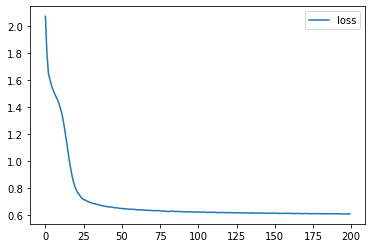

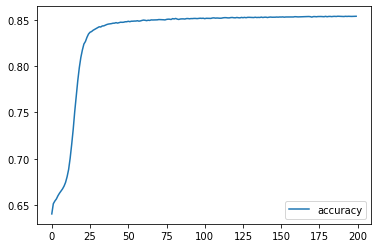

In [82]:
def show_history(history, aspect):
    plt.figure()
    plt.plot(history.history[aspect], label=aspect)
    plt.legend()
show_history(history, 'loss')
show_history(history, 'accuracy')

In [101]:
def generate_by_measure(measure):

    input1 = measure
    input1.append('</s>')
    head = ['<s>']
    head.extend(input1)
    sentence = ''
    for str1 in head:
        sentence += str1
        sentence += ' '
    sentence = sentence[:-1]
    input_ids = np.array(music_tokenizer.encode(sentence).ids).reshape(1, -1)
    input_ids = tf.convert_to_tensor(input_ids)
    print(input_ids.shape)
    
    beam_output = model.generate(
        input_ids,
        max_length=100,
        bos_token_id=1,
        pad_token_id=0,
        eos_token_id=2,
        num_beams=6, 
        no_repeat_ngram_size=3, 
        top_k=50
        )
    return beam_output




In [102]:
def give_measure(beam_output):
    output = music_tokenizer.decode(beam_output[0], skip_special_tokens=False).split(' ')
    output = output[output.index('<s>')+1:output.index('</s>')]

    sentence = ''
    for sen in output:
        sentence += sen

    sentence = sentence.replace('Ġ', ' ')
    return sentence

input1 = copy_dataset[5].vectorization(division=16).pitch[0]

In [103]:
for song in copy_dataset[:100]:
    input2 = song.vectorization(division=16).pitch[0]
    beam_output2 = generate_by_measure(input2)
    born_measure2 = give_measure(beam_output2)
    print(born_measure2)
    

(1, 33)
 A F SUS SUS SUS F SUS G SUS A F SUS C SUS A F G E SUS 
(1, 34)
 C G SUS A C C SUS G A C SUS C SUS D C E SUS A 
(1, 39)
 G D SUS D SUS G A SUS A SUS A D SUS D D SUS D A SUS D A SUS 
(1, 36)
 G C SUS D SUS E C SUS G SUS A C SUS C SUS D C E D SUS 
(1, 39)
 D G SUS D SUS G G SUS D SUS A A SUS B D SUS G B SUS D D SUS 
(1, 33)
 F F SUS C SUS G G SUS A A SUS C SUS SUS SUS A F SUS SUS SUS 
(1, 33)
 A A SUS F SUS C SUS A D A C SUS SUS SUS D A SUS A SUS 
(1, 30)
 E C SUS E SUS C SUS E SUS E SUS A SUS D D SUS SUS SUS 
(1, 32)
 E G SUS SUS SUS E SUS D G E G SUS SUS D SUS A SUS B SUS 
(1, 22)
 R SUS SUS SUS SUS SUS SUS SUS R SUS G SUS A SUS C SUS 
(1, 25)
 E SUS A SUS D SUS F SUS SUS SUS F SUS SUS SUS F SUS 
(1, 35)
 D B E F SUS B SUS E SUS C B D SUS SUS F SUS B SUS E SUS 
(1, 30)
 A B SUS F SUS D SUS F SUS SUS SUS F A SUS C SUS D SUS 
(1, 28)
 D D SUS A SUS D SUS A SUS E SUS SUS SUS D SUS E SUS 
(1, 27)
 A D B SUS SUS SUS SUS SUS SUS SUS E A SUS SUS SUS SUS SUS SUS SUS 
(1, 31)
 F C B F B

In [105]:
a = model.predict(inputs[0])
type(a)

1/1 [==============================] - 0s 63ms/step


transformers.modeling_tf_outputs.TFCausalLMOutputWithCrossAttentions

In [76]:
for index in list(zip(inputs, labels))[:100]:
    print(music_tokenizer.decode(index[0], skip_special_tokens=False).split(' '))
    print(music_tokenizer.decode(index[1], skip_special_tokens=False).split(' '))
    print('==================')

['<s>', 'ĠxCjvA', 'ĠSUS', 'ĠSUS', 'ĠSUS', 'ĠvB', 'ĠSUS', 'ĠxCj', 'ĠSUS', 'ĠwB', 'ĠSUS', 'ĠwFjvE', 'ĠSUS', 'ĠwGjvB', 'ĠSUS', 'ĠwA', 'ĠSUS', 'Ġ']
['ĠxCjvA', 'ĠSUS', 'ĠSUS', 'ĠSUS', 'ĠvB', 'ĠSUS', 'ĠxCj', 'ĠSUS', 'ĠwB', 'ĠSUS', 'ĠwFjvE', 'ĠSUS', 'ĠwGjvB', 'ĠSUS', 'ĠwA', 'ĠSUS', 'Ġ', '</s>']
['<s>', 'ĠwGjvGj', 'ĠSUS', 'ĠSUS', 'ĠSUS', 'ĠwFjvB', 'ĠSUS', 'ĠwGj', 'ĠSUS', 'ĠwE', 'ĠSUS', 'ĠvGj', 'ĠSUS', 'ĠvDj', 'ĠSUS', 'ĠwEvB', 'ĠwFj', 'Ġ']
['ĠwGjvGj', 'ĠSUS', 'ĠSUS', 'ĠSUS', 'ĠwFjvB', 'ĠSUS', 'ĠwGj', 'ĠSUS', 'ĠwE', 'ĠSUS', 'ĠvGj', 'ĠSUS', 'ĠvDj', 'ĠSUS', 'ĠwEvB', 'ĠwFj', 'Ġ', '</s>']
['<s>', 'ĠwGjvFj', 'ĠSUS', 'ĠSUS', 'ĠSUS', 'ĠwCjvGj', 'ĠSUS', 'ĠvA', 'ĠSUS', 'ĠwEvA', 'ĠSUS', 'ĠSUS', 'ĠSUS', 'ĠvFj', 'ĠwFj', 'ĠvGj', 'ĠSUS', 'Ġ']
['ĠwGjvFj', 'ĠSUS', 'ĠSUS', 'ĠSUS', 'ĠwCjvGj', 'ĠSUS', 'ĠvA', 'ĠSUS', 'ĠwEvA', 'ĠSUS', 'ĠSUS', 'ĠSUS', 'ĠvFj', 'ĠwFj', 'ĠvGj', 'ĠSUS', 'Ġ', '</s>']
['<s>', 'ĠwEvB', 'ĠSUS', 'ĠvFj', 'ĠSUS', 'ĠvB', 'ĠSUS', 'ĠSUS', 'ĠSUS', 'ĠwDjvFj', 'ĠSUS', 'ĠSUS', 'ĠSUS', 'ĠSUS', 'ĠSUS', 